[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jkitchin/s26-06642/blob/main/dsmles/participation/participation-13-model-interpretability.ipynb)

# Module 13: Model Interpretability - Participation Exercises

## Exercise 13.1: Discussion - Explaining to Stakeholders

**Type:** 💬 Discussion (5 min)

Your black-box model recommends changing a reactor setpoint. The operator asks: "Why?"

**Discuss:**
1. What would be a satisfying answer?
2. How might SHAP values help?
3. When might "trust the model" be an acceptable answer? When is it not?

*Discussion notes:*



## Exercise 13.2: Mini-Exercise - SHAP Interpretation

**Type:** 🔧 Mini-Exercise (7 min)

Interpret a SHAP summary plot.

/Users/jkitchin/Dropbox/emacs/projects/s26-06642/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/gq/k1kgbl7n539_4dl1md8x3jt80000gn/T/ipykernel_60877/3692351850.py:32: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X[:50], feature_names=feature_names, show=False)


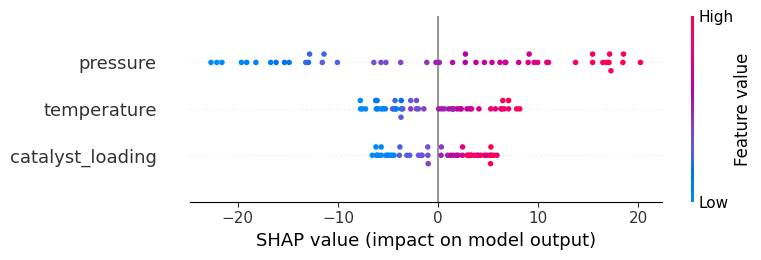

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Create interpretable data
np.random.seed(42)
n = 200

temperature = np.random.uniform(300, 500, n)
pressure = np.random.uniform(1, 10, n)
catalyst = np.random.uniform(1, 5, n)

# yield increases with temp and pressure, decreases with too much catalyst
y = (0.1 * temperature + 
     5 * pressure + 
     10 * catalyst - catalyst**2 +  # Optimum catalyst loading
     np.random.randn(n) * 3)

X = np.column_stack([temperature, pressure, catalyst])
feature_names = ['temperature', 'pressure', 'catalyst_loading']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# If SHAP is available:
try:
    import shap
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X[:50])  # Sample for speed
    
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X[:50], feature_names=feature_names, show=False)
    plt.tight_layout()
    plt.show()
except ImportError:
    print("SHAP not available - interpret feature importance instead:")
    for name, imp in zip(feature_names, model.feature_importances_):
        print(f"  {name}: {imp:.3f}")

# TASK: Based on the plot (or importances):
# 1. Which feature has the largest impact?
# 2. Is the effect of temperature positive or negative?
# 3. What's unusual about catalyst_loading?

*Your interpretation:*



## Exercise 13.3: Reflection - The Right to Explanation

**Type:** 🤔 Reflection (3 min)

In many contexts (medical, legal, financial), there's growing demand for "explainable AI."

**Reflect:**
1. In chemical engineering applications, when is model explainability critical?
2. When might an unexplainable model be acceptable?
3. How does interpretability relate to trust and safety?

*Your reflection:*

